## [Dataset: Hourly Electricity Consumption and Production](https://www.kaggle.com/datasets/stefancomanita/hourly-electricity-consumption-and-production)

## Guidelines
* [Electricity Consumption Production Visualization - part 1 - EDA](https://www.kaggle.com/code/stefancomanita/electricity-consumption-production-visualization)
* [Electricity Consumption Production Visualization - part 2 - modeling](https://www.kaggle.com/code/stefancomanita/timeseries-forecasting-with-regression-and-prophet)
* [Electricity Consumption EDA Visualization](https://www.kaggle.com/code/arghyabanerjee17/electricity-consumption-eda-visualization)

In [9]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from prophet import Prophet
%matplotlib inline

In [10]:
data_file = './data/electricity_consumption_and_productioction.csv'
df = pd.read_csv(data_file)
# set the 'DateTime' as the index
df.set_index('DateTime', inplace=True)
# convert the index to datetime format
df.index = pd.to_datetime(df.index)

# set the maximum number of columns to be displayed to unlimited
pd.set_option('display.max_columns', None)
# prevent the DataFrame from wrappig to a new line
pd.set_option('expand_frame_repr', False)

df.head

<bound method NDFrame.head of                      Consumption  Production  Nuclear  Wind  Hydroelectric  Oil and Gas  Coal  Solar  Biomass
DateTime                                                                                                     
2019-01-01 00:00:00         6352        6527     1395    79           1383         1896  1744      0       30
2019-01-01 01:00:00         6116        5701     1393    96           1112         1429  1641      0       30
2019-01-01 02:00:00         5873        5676     1393   142           1030         1465  1616      0       30
2019-01-01 03:00:00         5682        5603     1397   191            972         1455  1558      0       30
2019-01-01 04:00:00         5557        5454     1393   159            960         1454  1458      0       30
...                          ...         ...      ...   ...            ...          ...   ...    ...      ...
2023-03-12 19:00:00         6500        6643     1407   111           3084          933  1

In [72]:
print(df.shape)
df.isnull().sum()

(36772, 9)


Consumption      0
Production       0
Nuclear          0
Wind             0
Hydroelectric    0
Oil and Gas      0
Coal             0
Solar            0
Biomass          0
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36772 entries, 2019-01-01 00:00:00 to 2023-03-12 23:00:00
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Consumption    36772 non-null  int64
 1   Production     36772 non-null  int64
 2   Nuclear        36772 non-null  int64
 3   Wind           36772 non-null  int64
 4   Hydroelectric  36772 non-null  int64
 5   Oil and Gas    36772 non-null  int64
 6   Coal           36772 non-null  int64
 7   Solar          36772 non-null  int64
 8   Biomass        36772 non-null  int64
dtypes: int64(9)
memory usage: 3.8 MB


In [73]:
df.describe()

,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
count,36772.000000,36772.000000,36772.000000,36772.000000,36772.000000,36772.000000,36772.000000,36772.000000,36772.000000
mean,6707.924889,6543.770478,1293.468590,785.700723,1801.603149,1181.630017,1270.038236,151.524094,58.730828
std,1034.961146,1005.486125,237.348752,681.508967,678.981785,422.487653,306.550193,222.768784,13.363835
min,4081.000000,3315.000000,612.000000,-26.000000,175.000000,213.000000,279.000000,0.000000,18.000000
25%,5895.750000,5833.000000,1349.000000,226.000000,1310.000000,881.000000,1080.000000,0.000000,49.000000
50%,6686.000000,6492.000000,1386.000000,577.000000,1708.000000,1216.000000,1254.000000,2.000000,61.000000
75%,7434.000000,7210.000000,1409.000000,1195.250000,2184.000000,1502.000000,1467.000000,268.000000,68.000000
max,9615.000000,9886.000000,1457.000000,2811.000000,4359.000000,2141.000000,2537.000000,869.000000,89.000000


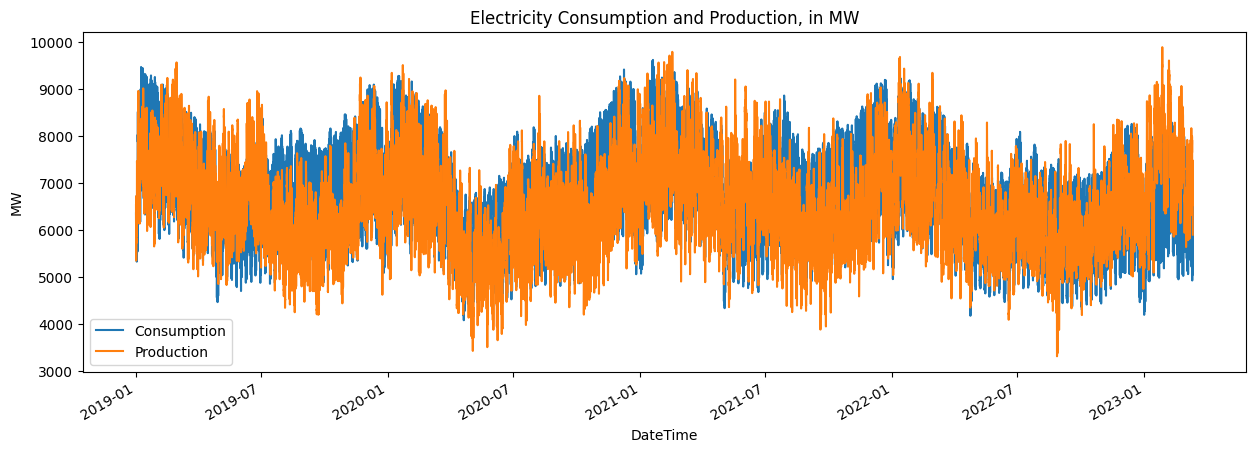

In [27]:
selected_cols = df[['Consumption', 'Production']]
selected_cols.plot(style='-', figsize=(15, 5), title='Electricity Consumption and Production, in MW')
plt.ylabel('MW')
plt.show()

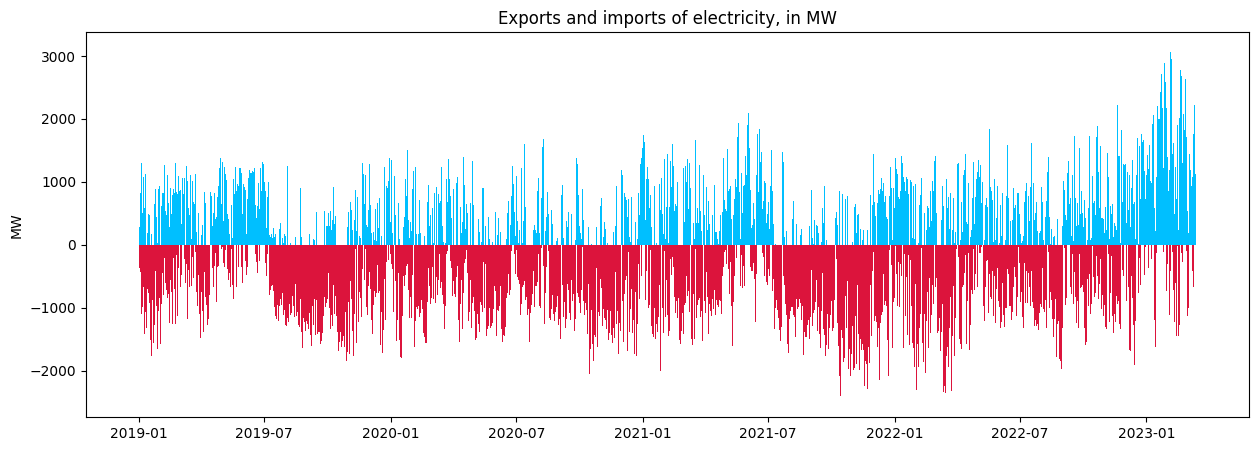

CPU times: total: 32.3 s
Wall time: 32.7 s


In [30]:
%%time
df['delta'] = df['Production'] - df['Consumption']
plt.rcParams['figure.figsize'] = (15, 5)
plt.bar(
    df.index, df['delta'],
    color=np.where(df['delta'] > 0, 'deepskyblue', 'crimson')
)
plt.title('Exports and imports of electricity, in MW')
plt.ylabel('MW')
plt.show()

df.drop(['delta'], axis=1, inplace=True)

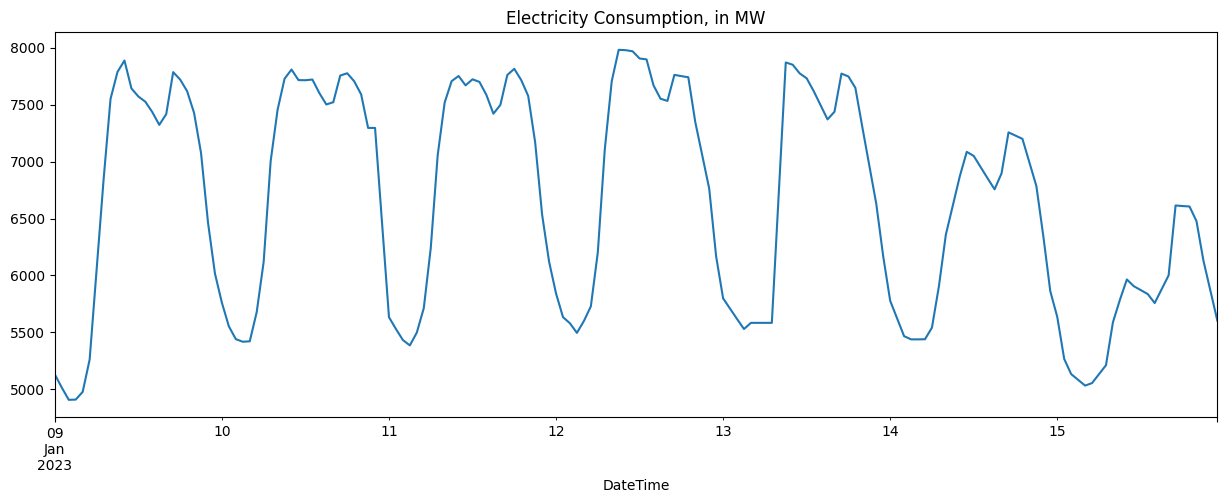

In [4]:
df['2023-01-09 00:00:00' : '2023-01-15 23:59:59']['Consumption'].plot(
    style='-', figsize=(15, 5), title='Electricity Consumption, in MW'
)
plt.show()

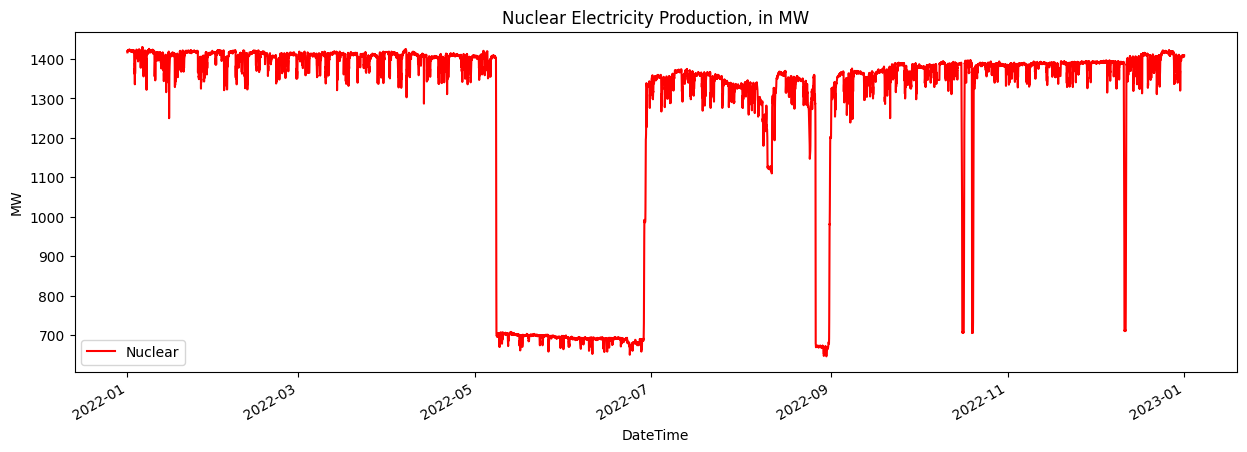

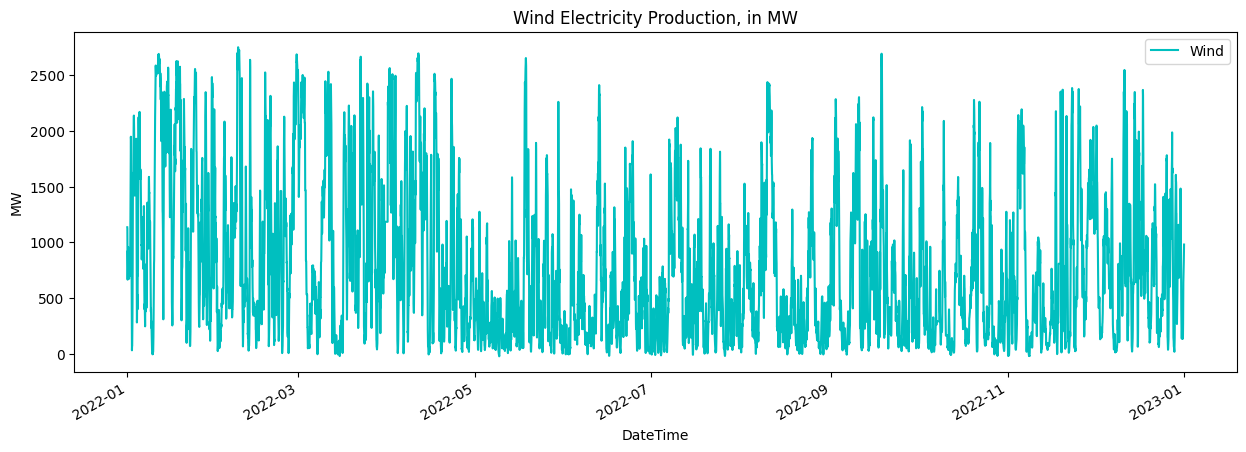

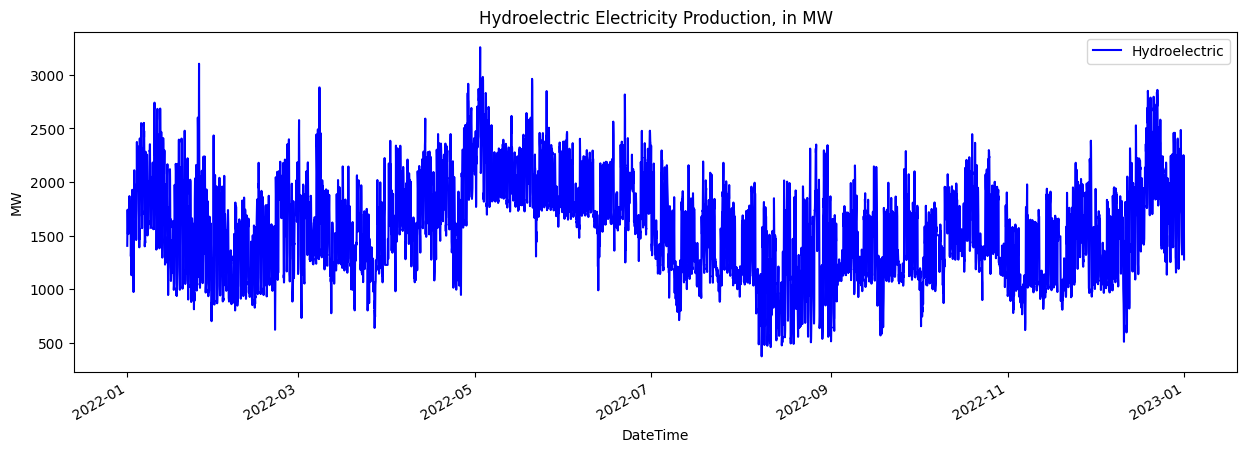

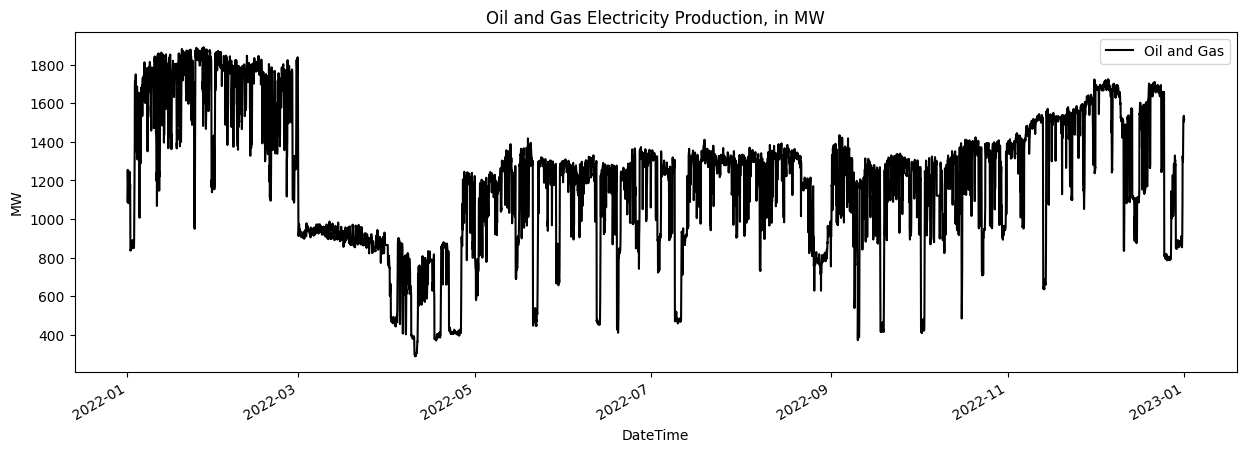

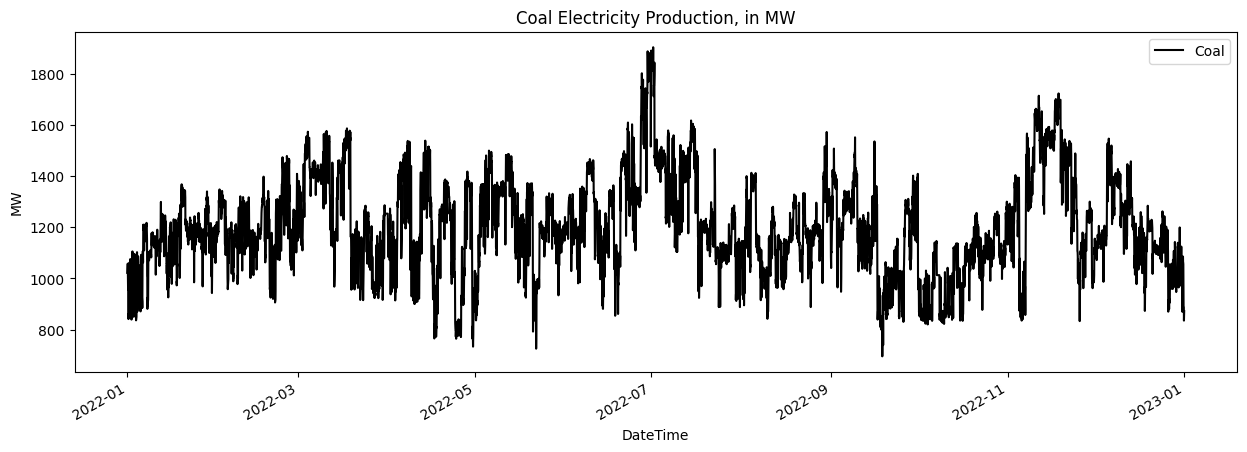

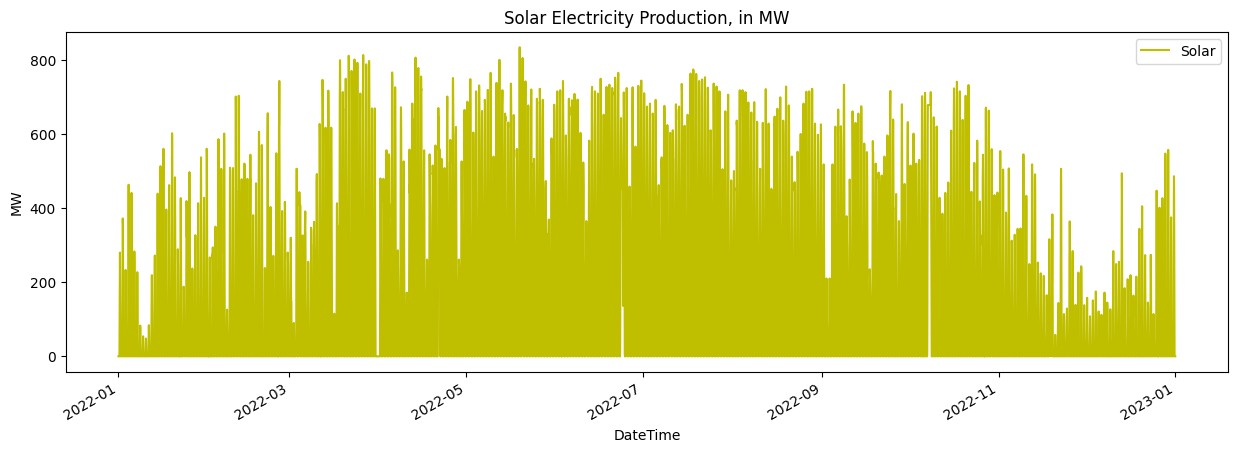

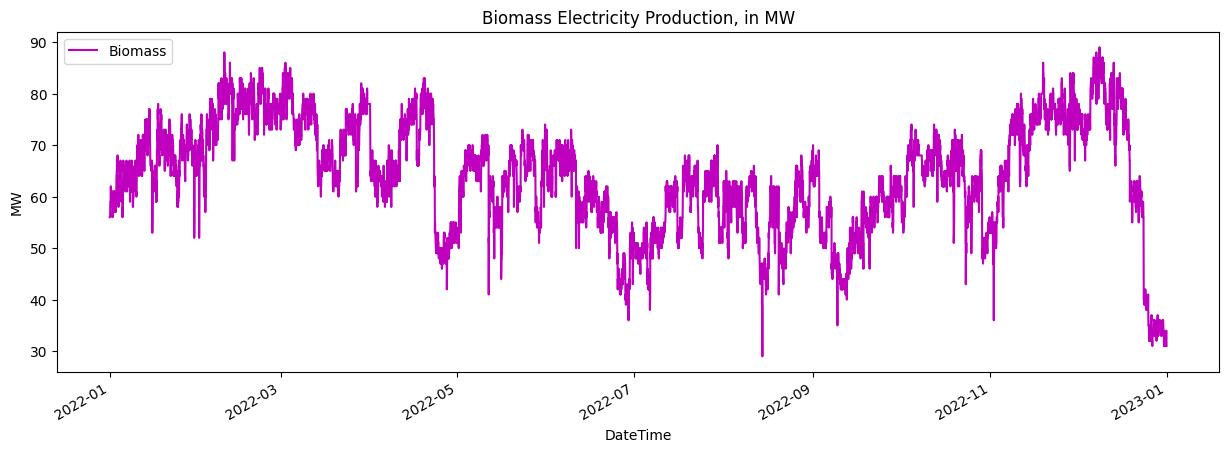

In [32]:
df_year = df['2022-01-01 00:00:00' : '2022-12-31 23:59:59']
production_types = ['Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']
color_map = {"Nuclear":"r", "Wind":"c", "Hydroelectric":"b", "Oil and Gas":"k", "Coal":"k", "Solar":"y", "Biomass":"m"}
for production_type in production_types:
    df_year[[production_type]].plot(
        style='-', figsize=(15, 5), title=f"{production_type} Electricity Production, in MW", color=color_map.get(production_type)
    )
    plt.ylabel('MW')
    plt.show()

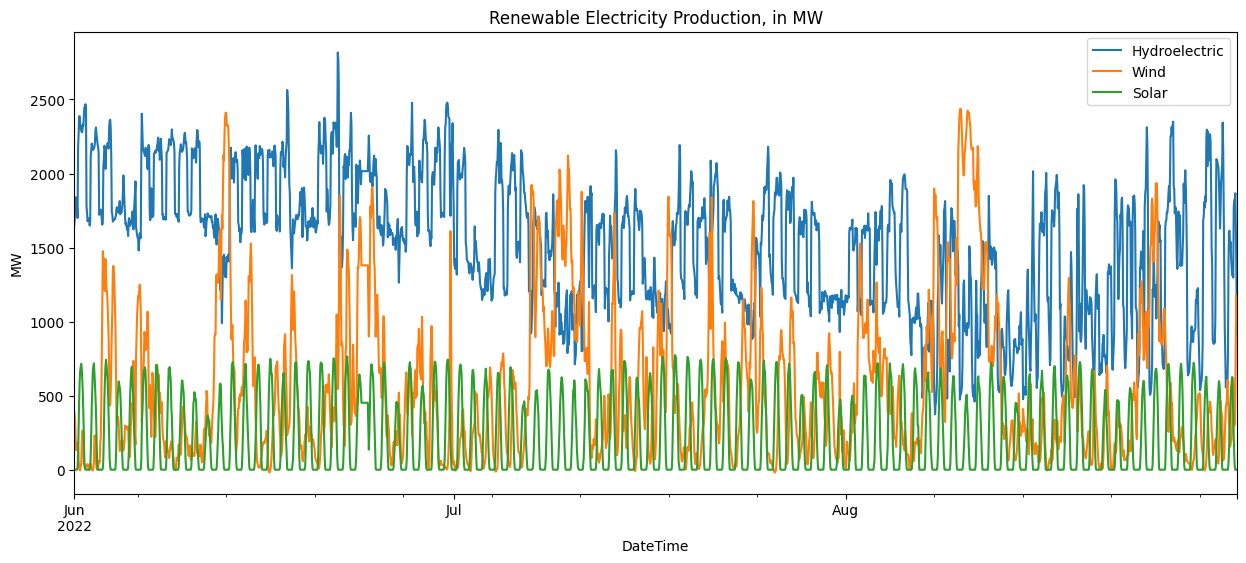

In [33]:
df_summer = df[["Hydroelectric", "Wind", "Solar"]]["2022-06-01 00:00:00" : "2022-08-31 23:59:59"]
df_summer.plot(
    style="-", figsize=(15, 6), title=f"Renewable Electricity Production, in MW"
)
plt.ylabel('MW')
plt.show()

## Making Individual DateTime attributes like Year, Month, Day and Week of the Day

In [6]:
df['Day'] = df.index.day
df['Year'] = df.index.year
df['Month'] = df.index.month
df['WeekDay'] = df.index.day_name()

In [7]:
df.head

<bound method NDFrame.head of                      Consumption  Production  Nuclear  Wind  Hydroelectric  Oil and Gas  Coal  Solar  Biomass  Day  Year  Month  WeekDay
DateTime                                                                                                                                
2019-01-01 00:00:00         6352        6527     1395    79           1383         1896  1744      0       30    1  2019      1  Tuesday
2019-01-01 01:00:00         6116        5701     1393    96           1112         1429  1641      0       30    1  2019      1  Tuesday
2019-01-01 02:00:00         5873        5676     1393   142           1030         1465  1616      0       30    1  2019      1  Tuesday
2019-01-01 03:00:00         5682        5603     1397   191            972         1455  1558      0       30    1  2019      1  Tuesday
2019-01-01 04:00:00         5557        5454     1393   159            960         1454  1458      0       30    1  2019      1  Tuesday
...        

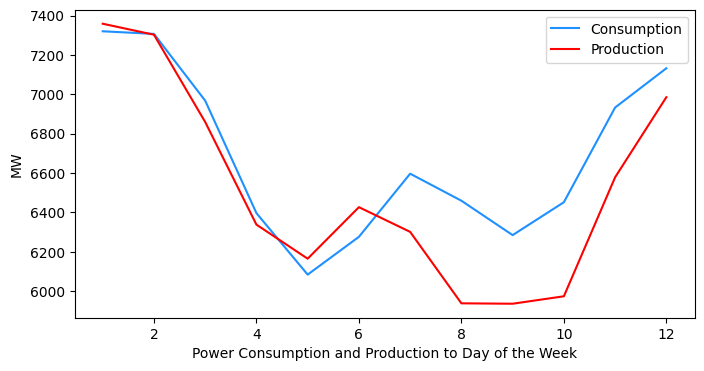

In [8]:
# df_mean_by_month = df.groupby('Month').mean()
df_mean_by_month = df.groupby('Month').mean(numeric_only=True)
plt.figure(figsize=(8,4))
plt.plot(df_mean_by_month.index, df_mean_by_month['Consumption'], 'dodgerblue')
plt.plot(df_mean_by_month.index, df_mean_by_month['Production'], 'r')
plt.xlabel('Power Consumption and Production to Day of the Week')
plt.ylabel('MW')
plt.legend(['Consumption', 'Production'])
plt.show()

## Power Consumption by Day of the Week

In [61]:
df_mean_by_day = df.groupby('WeekDay').mean()

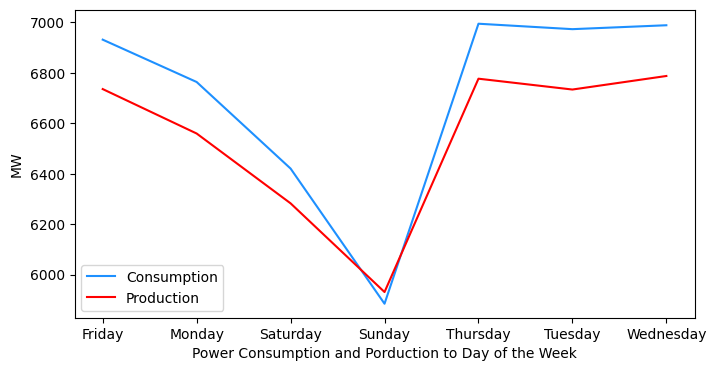

In [46]:
plt.figure(figsize=(8,4))
plt.plot(df_mean_by_day.index, df_mean_by_day['Consumption'], 'dodgerblue')
plt.plot(df_mean_by_day.index, df_mean_by_day['Production'], 'r')
plt.xlabel('Power Consumption and Porduction to Day of the Week')
plt.ylabel('MW')
plt.legend(['Consumption', 'Production'])
plt.show()

In [11]:
df.drop(["Production", "Nuclear", "Wind", "Hydroelectric", "Oil and Gas", "Coal", "Solar", "Biomass"], axis=1, inplace=True)
df.head()

,Consumption
DateTime,
2019-01-01 00:00:00,6352
2019-01-01 01:00:00,6116
2019-01-01 02:00:00,5873
2019-01-01 03:00:00,5682
2019-01-01 04:00:00,5557


### Plot to see if the seasonality checks up.
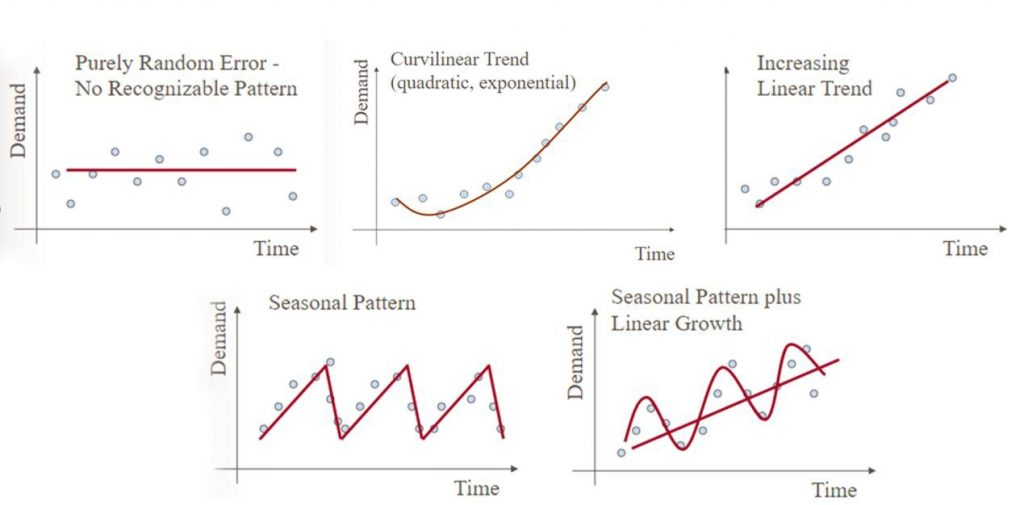

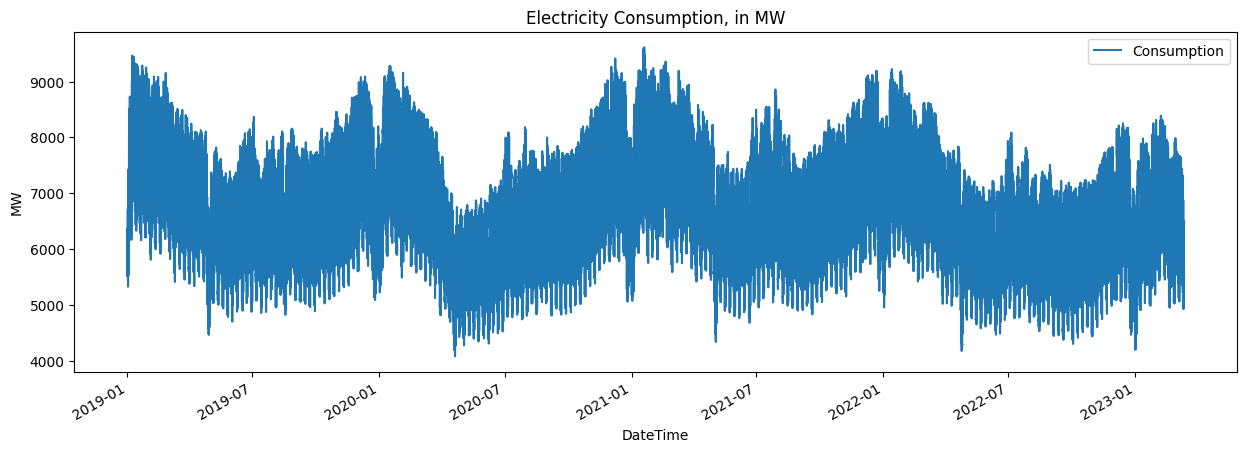

In [75]:
df[["Consumption"]].plot(style="-", figsize=(15, 5), title="Electricity Consumption, in MW")
plt.ylabel('MW')
plt.show()

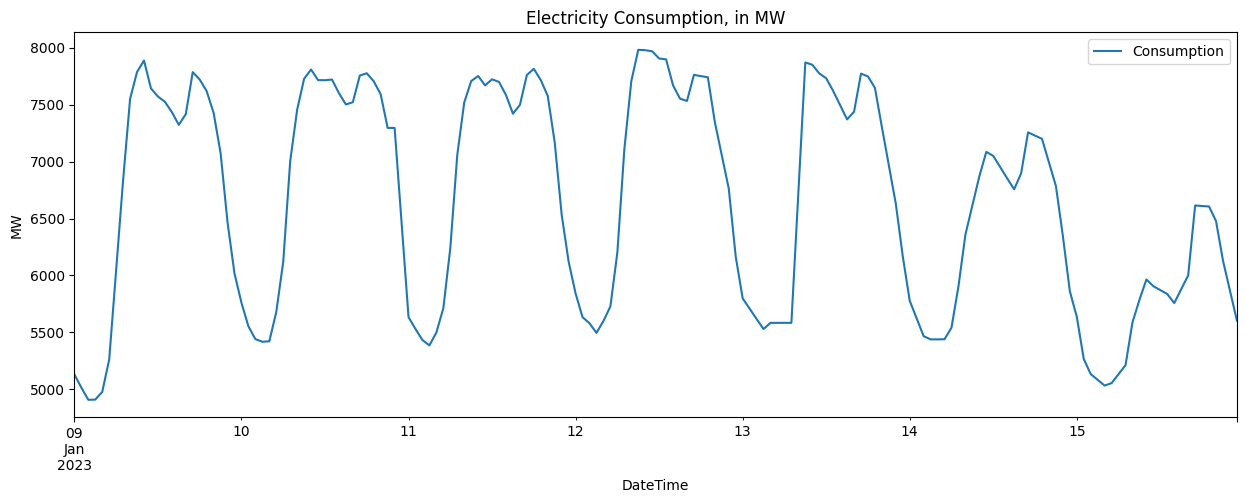

In [76]:
df["2023-01-09 00:00:00" : "2023-01-15 23:59:59"][["Consumption"]].plot(style="-", figsize=(15, 5), title="Electricity Consumption, in MW")
plt.ylabel('MW')
plt.show()

### Add time features by the time index

In [12]:
def create_time_features(df):
    df['hour'] = df.index.hour
    df['day_of_week'] = df.index.day_of_week
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['day_of_year'] = df.index.dayofyear
    df['mavg_of_days'] = df['Consumption'].rolling(window=7).mean()
    # [1] drop NaN values
    df.dropna(inplace=True)

create_time_features(df)
df


,Consumption,hour,day_of_week,quarter,month,year,day_of_year,mavg_of_days
DateTime,,,,,,,,
2019-01-01 06:00:00,5513,6,1,1,1,2019,1,5802.571429
2019-01-01 07:00:00,5524,7,1,1,1,2019,1,5684.285714
2019-01-01 08:00:00,5510,8,1,1,1,2019,1,5597.714286
2019-01-01 09:00:00,5617,9,1,1,1,2019,1,5561.142857
2019-01-01 10:00:00,5643,10,1,1,1,2019,1,5555.571429
...,...,...,...,...,...,...,...,...
2023-03-12 19:00:00,6500,19,6,1,3,2023,71,5542.571429
2023-03-12 20:00:00,6471,20,6,1,3,2023,71,5729.857143
2023-03-12 21:00:00,6194,21,6,1,3,2023,71,5894.142857


### Split data set into training set/test set

In [14]:
cut_off_date = df.index[-365 * 24]
print(f"Cut Off Date = {cut_off_date}")

train_set = df.loc[df.index <= cut_off_date]
test_set = df.loc[df.index > cut_off_date]

print(f"train_size= {len(train_set)}, test_size={len(test_set)}")


Cut Off Date = 2022-03-13 01:00:00
train_size= 28007, test_size=8759


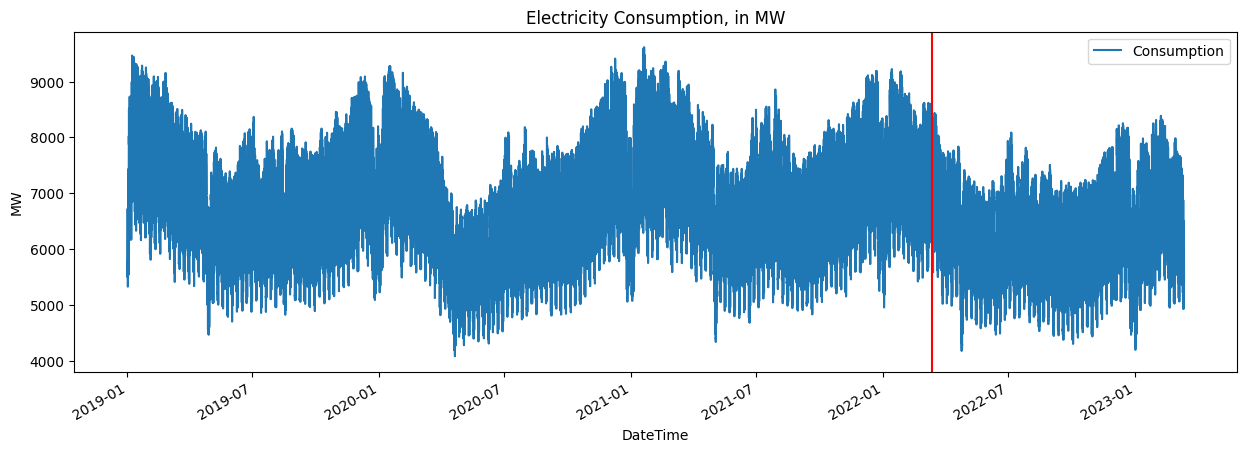

In [15]:

df[['Consumption']].plot(
    style="-", figsize=(15, 5), title="Electricity Consumption, in MW"
)
plt.ylabel('MW')
plt.axvline(x=cut_off_date, color='r')
plt.show()

### Create simple method for calculating the error

In [16]:
def mean_absolute_error_as_percentage(real, predicted):
    real = np.array(real)
    predicted = np.array(predicted)
    return np.mean(np.abs((real- predicted) / real)) * 100

In [17]:
%%time
FEATURES = ["hour", "day_of_week", "quarter", "month", "year", "day_of_year", "mavg_of_days"]
TARGET = "Consumption"

X_train = train_set[FEATURES]
y_train = train_set[TARGET]

X_test = test_set[FEATURES]
y_test = test_set[TARGET]

# define and XGB regressor, fit it on our train data and use it to predict our test data
regressor = xgb.XGBRegressor(
    n_estimators=1500, early_stoppin_rounds=50, learning_rate=0.01
)
regressor.fit(
    X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=100
)

[11:58:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "early_stoppin_rounds" } are not used.

[0]	validation_0-rmse:6852.09794	validation_1-rmse:6275.18382
[100]	validation_0-rmse:2522.37229	validation_1-rmse:2280.46378
[200]	validation_0-rmse:943.78845	validation_1-rmse:830.36696
[300]	validation_0-rmse:382.92576	validation_1-rmse:336.54266
[400]	validation_0-rmse:203.44526	validation_1-rmse:207.79462
[500]	validation_0-rmse:154.22889	validation_1-rmse:185.74891
[600]	validation_0-rmse:135.60956	validation_1-rmse:180.91313
[700]	validation_0-rmse:127.17352	validation_1-rmse:178.36169
[800]	validation_0-rmse:122.56067	validation_1-rmse:176.75864
[900]	validation_0-rmse:118.84179	validation_1-rmse:175.36470
[1000]	validation_0-rmse:115.33275	validation_1-rmse:173.73384
[1100]	validation_0-rmse:112.55061	validation_1-rmse:172.41744
[1200]	validation_0-rmse:110.39356	validat

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stoppin_rounds=50,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1500, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

In [18]:
regressor_output = regressor.predict(X_test)
prediction = pd.DataFrame(
    data=regressor_output, index=X_test.index, columns=['prediction']
)
df = df.merge(prediction, how='left', left_index=True, right_index=True)
# our predictions are at the end of the dataframe, so we should print that
df.tail()

,Consumption,hour,day_of_week,quarter,month,year,day_of_year,mavg_of_days,prediction
DateTime,,,,,,,,,
2023-03-12 19:00:00,6500,19,6,1,3,2023,71,5542.571429,6147.007812
2023-03-12 20:00:00,6471,20,6,1,3,2023,71,5729.857143,6396.182129
2023-03-12 21:00:00,6194,21,6,1,3,2023,71,5894.142857,6419.352051
2023-03-12 22:00:00,5708,22,6,1,3,2023,71,5981.857143,6059.385742
2023-03-12 23:00:00,5409,23,6,1,3,2023,71,6001.000000,5605.368164


In [20]:
test_df = df.loc[df.index > cut_off_date]
y_target = test_df['Consumption']
y_predict = test_df['prediction']
print(f"Percentage error: {mean_absolute_error_as_percentage(y_target, y_predict):.4f}")

Percentage error: 1.9424


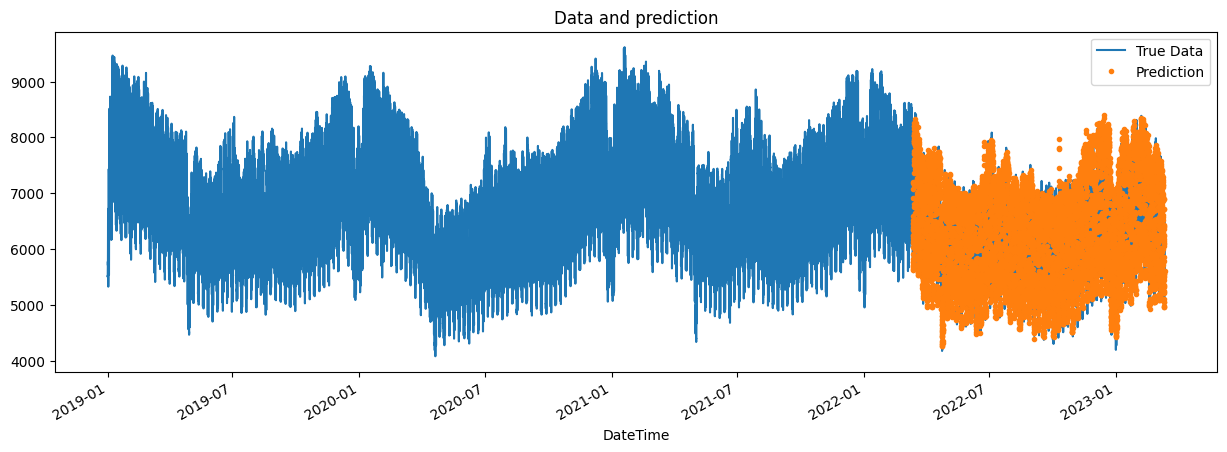

In [19]:
ax = df[[TARGET]].plot(figsize=(15, 5))
df["prediction"].plot(ax=ax, style='.')
ax.legend(['True Data', 'Prediction'])
ax.set_title('Data and prediction')
plt.show()

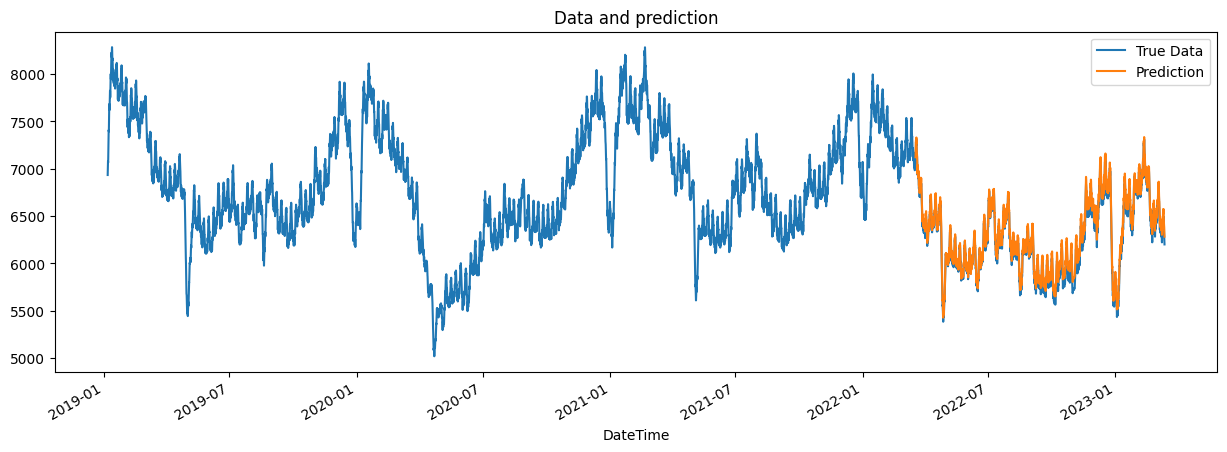

In [21]:
roll_mean_target = df['Consumption'].rolling(window=128).mean()
roll_mean_predict = df['prediction'].rolling(window=128).mean()

ax = roll_mean_target.plot(figsize=(15, 5))
roll_mean_predict.plot(ax=ax, style='-')
ax.legend(['True Data', 'Prediction'])
ax.set_title('Data and prediction')
plt.show()

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Create sample time-series data
dates = pd.date_range('2020-01-01', periods=30, freq='D')
data = np.random.randint(10, 30, size=30)
df_avg = pd.DataFrame({'Date': dates, 'Value': data}) 

# Calculate rolling mean with 7 day window
df_avg['Avg'] = df_avg['Value'].rolling(window=7).mean()
df_avg

,Date,Value,Avg
0,2020-01-01,27,NaN
1,2020-01-02,19,NaN
2,2020-01-03,21,NaN
3,2020-01-04,26,NaN
4,2020-01-05,17,NaN
5,2020-01-06,11,NaN
6,2020-01-07,13,19.142857
7,2020-01-08,19,18.000000
8,2020-01-09,10,16.714286
9,2020-01-10,16,16.000000


In [184]:
# [1] Fill NaN with a fixed value like 0
# df_avg['Avg'].fillna(0, inplace=True)
# [2] Drop NaN rows 
# df_avg.dropna(inplace=True)
# [3] Dynamically adjust window size
# df_avg['Avg'] = df_avg['Value'].rolling(window=7, min_periods=1).mean()
# [4] Forward fill NaN values
df_avg['Avg'].fillna(method='ffill', inplace=True)
df_avg

,Date,Value,Avg
0,2020-01-01,20,NaN
1,2020-01-02,10,NaN
2,2020-01-03,22,NaN
3,2020-01-04,16,NaN
4,2020-01-05,20,NaN
5,2020-01-06,12,NaN
6,2020-01-07,20,17.142857
7,2020-01-08,18,16.857143
8,2020-01-09,22,18.571429
9,2020-01-10,10,16.857143


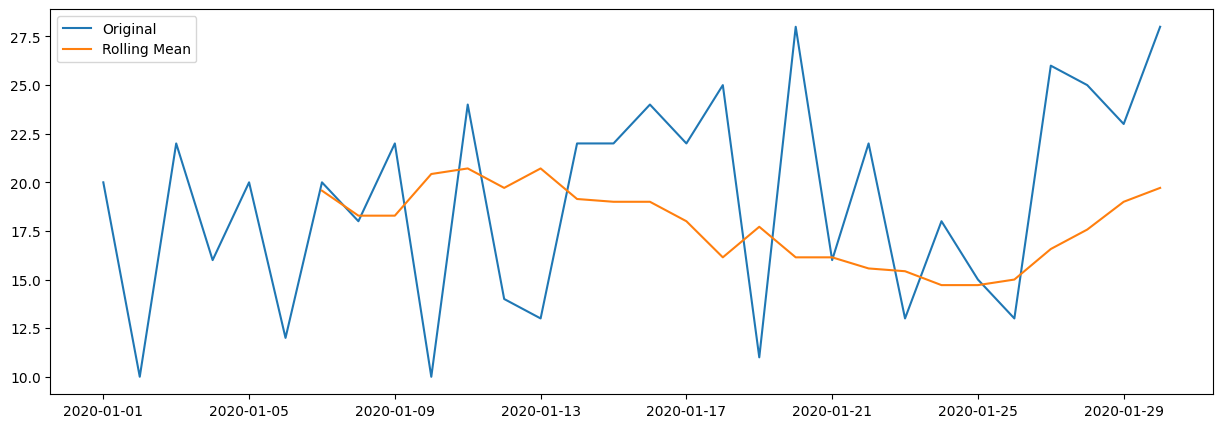

In [185]:

# Plot original time-series  
plt.plot(df_avg['Date'], df_avg['Value'], label='Original')

# Plot moving average on top
plt.plot(df_avg['Date'], roll_mean, label='Rolling Mean')

# Add legends and display
plt.legend(loc='upper left')  
plt.show()